In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [2]:
#reading the data
df = pd.read_excel(r"C:\Users\DELL\Desktop\Data Science\Files\loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [3]:
#assigning x and y
x = df.iloc[:,df.columns != 'Decision']
y =df['Decision']

In [4]:
x.shape

(429, 13)

In [5]:
#numerical columns
inputs_numerical = x.select_dtypes(include='number')
inputs_numerical

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,50.750000,0.585,0,0,145,0
1,19.670000,10.000,0,0,140,0
2,52.830002,15.000,5,14,0,2200
3,22.670000,2.540,2,0,0,0
4,29.250000,13.000,0,0,228,0
...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200
425,22.250000,1.250,3,0,280,0
426,23.330000,1.500,1,0,422,200
427,21.000000,4.790,2,1,80,300


In [6]:
#categorical columns
inputs_categorical = x.select_dtypes(include='object')
inputs_categorical.columns

Index(['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status',
       'Liab_ref', 'Acc_ref'],
      dtype='object')

In [7]:
#processing the dataset
le = preprocessing.LabelEncoder()

In [8]:
X = inputs_categorical.apply(le.fit_transform)
X.head()

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref
0,1,0,0,11,6,0,0
1,1,1,1,4,0,1,0
2,0,0,0,0,2,0,0
3,1,1,1,0,0,0,0
4,1,0,0,1,0,0,0


In [9]:
#concatenating numerical dataset & label encoded categorical dataset
new_inputs = pd.concat(objs= [X,inputs_numerical],axis='columns')
new_inputs.head()

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,1,0,0,11,6,0,0,50.750000,0.585,0,0,145,0
1,1,1,1,4,0,1,0,19.670000,10.000,0,0,140,0
2,0,0,0,0,2,0,0,52.830002,15.000,5,14,0,2200
3,1,1,1,0,0,0,0,22.670000,2.540,2,0,0,0
4,1,0,0,1,0,0,0,29.250000,13.000,0,0,228,0


In [28]:
#OneHotEncoder
enc = preprocessing.OneHotEncoder()

#fit
enc.fit(inputs_categorical)

# transform
onehotlabel = enc.transform(inputs_categorical).toarray()
onehotlabel.shape

(429, 29)

In [29]:
onehotlabel

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.]])

In [12]:
#checking for missing value
df.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [13]:
df.shape

(429, 14)

In [14]:
df = df.drop(['Sex'],axis=1)
df.shape

(429, 13)

In [15]:
df=df.drop(['Telephone'],axis=1)
df.shape

(429, 12)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(onehotlabels,y, random_state=0)

In [17]:
model = LogisticRegression(solver='lbfgs',random_state=0)

In [18]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [19]:
p_value = model.predict(onehotlabels)
p_value

array(['reject', 'reject', 'accept', 'accept', 'reject', 'reject',
       'accept', 'accept', 'reject', 'reject', 'accept', 'reject',
       'reject', 'accept', 'accept', 'reject', 'accept', 'reject',
       'reject', 'accept', 'accept', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'accept', 'accept', 'reject',
       'reject', 'reject', 'accept', 'accept', 'reject', 'reject',
       'reject', 'reject', 'reject', 'accept', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'reject',
       'reject', 'reject', 'reject', 'accept', 'accept', 'accept',
       'reject', 'reject', 'reject', 'reject', 'accept', 'reject',
       'reject', 'accept', 'accept', 'accept', 'reject', 'accept',
       'reject', 'accept', 'reject', 'accept', 'accept', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'accept',
       'accept', 'accept', 'reject', 'accept', 'reject', 'reject',
       'reject', 'accept', 'accept', 'accept', 'reject', 'reje

In [20]:
corr = df.corr()
corr

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
Age,1.000000,0.217342,0.426890,0.208736,-0.072254,0.101819
Time_at_address,0.217342,1.000000,0.278849,0.202083,-0.267470,0.072235
Time_employed,0.426890,0.278849,1.000000,0.291542,-0.110933,0.112719
Time_bank,0.208736,0.202083,0.291542,1.000000,-0.111761,0.153435
Home_Expn,-0.072254,-0.267470,-0.110933,-0.111761,1.000000,0.080366
Balance,0.101819,0.072235,0.112719,0.153435,0.080366,1.000000


In [21]:
r_sq = model.score(onehotlabels, y)
r_sq

0.9067599067599068

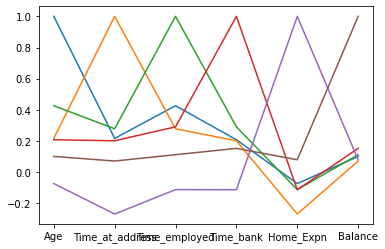

In [22]:
plt.plot(corr)


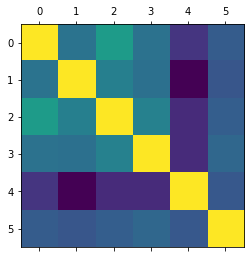

In [23]:
plt.matshow(corr)
plt.show()

<AxesSubplot:>

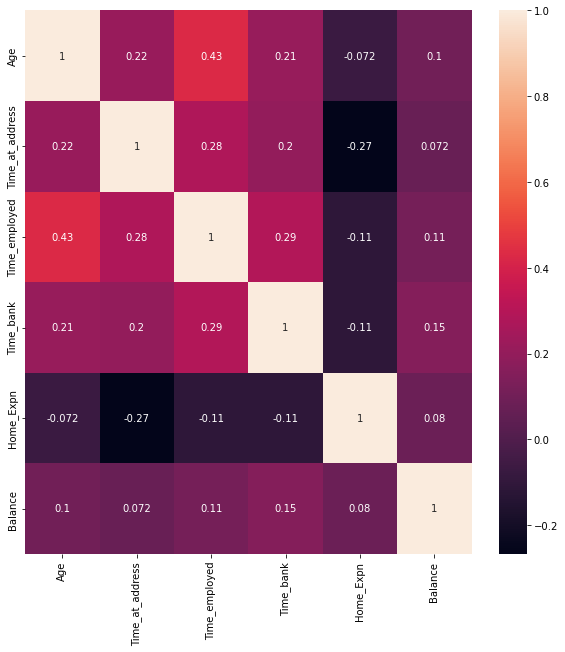

In [25]:
import seaborn as sns
figure, axes = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=axes)